### Training the GAN model for proxy MNIST experiment
This notebook contains the training code for the GAN model that is used as the data generating proess for the proxy MNIST expeirment.

In [14]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from GANmodel import *

In [15]:
"""Training data"""
transform = transforms.Compose([
    transforms.ToTensor(),  # Transform to tensor
    transforms.Normalize((0.5,), (0.5,))
])
data_dir = "./Data/MNIST/"
trainset = torchvision.datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)

batch_size = 100
data_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

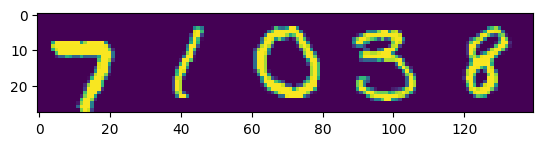

In [19]:
example_data = next(iter(data_loader))[0]
example_data = torch.cat([example_data[i,0,:,:] for i in range(5)],1)
plt.imshow(example_data.detach().numpy())

In [20]:
device='mps'
nz = 3
netG = Generator(nz=nz, ngf=64, nc=1)
netD = Discriminator(nc=1, ndf=64)

netD = netD.to(device)
netG = netG.to(device)

Epoch 1
0.6561137437820435 0.45051199197769165
0.6427061557769775 0.33006858825683594
0.6244622468948364 0.3206804692745209
0.484226793050766 0.20339395105838776
0.6482442617416382 0.3498980700969696
0.6879502534866333 0.36729881167411804


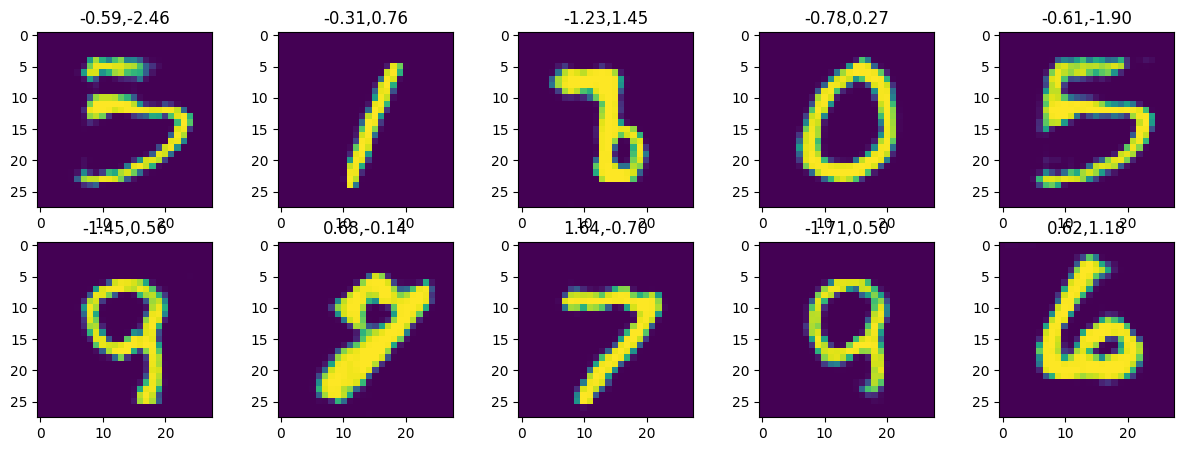

Epoch 2
0.48800909519195557 0.20341739058494568
0.6460336446762085 0.34674933552742004
0.694202721118927 0.40282541513442993
0.7453979253768921 0.46220311522483826
0.6191516518592834 0.3364793360233307
0.5236218571662903 0.19917114078998566


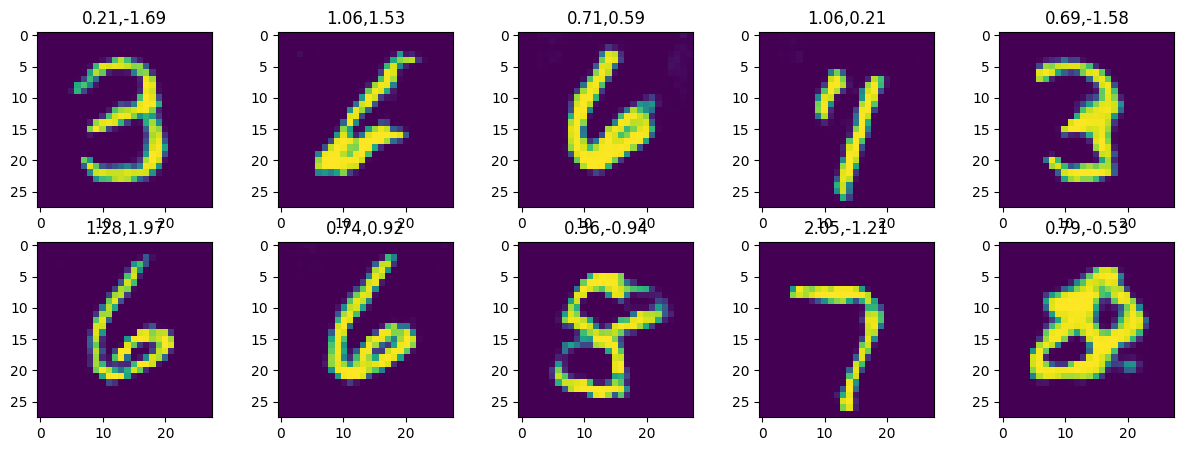

Epoch 3
0.6792317032814026 0.40447044372558594
0.5488877892494202 0.25197845697402954
0.7105225920677185 0.45587384700775146
0.6208199858665466 0.33445537090301514
0.6494080424308777 0.29813751578330994
0.6506674289703369 0.34920093417167664


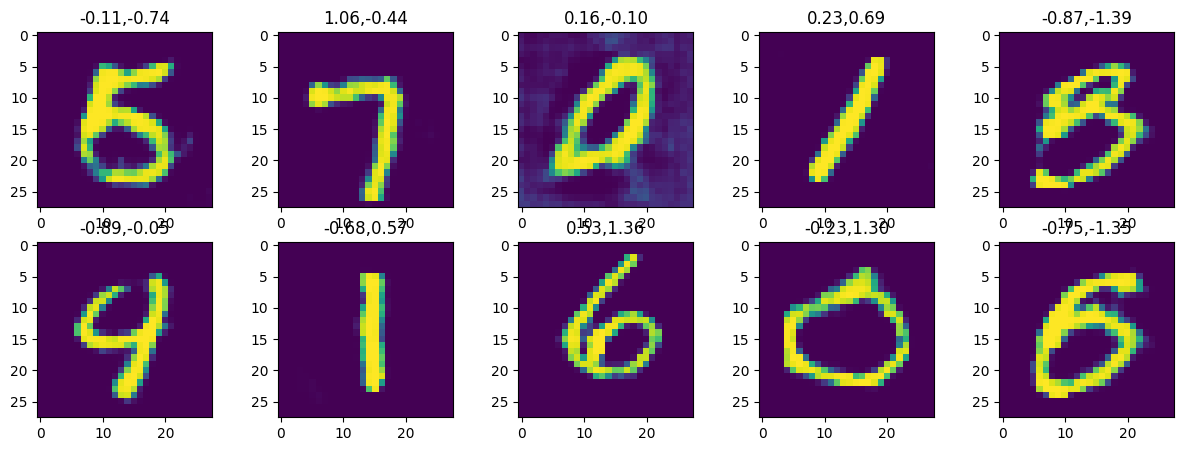

Epoch 4
0.599187970161438 0.3200904130935669
0.7643675208091736 0.5402827858924866
0.7673467993736267 0.48901721835136414
0.6146541237831116 0.3415340483188629
0.639236330986023 0.3810047507286072
0.6805349588394165 0.4538837969303131


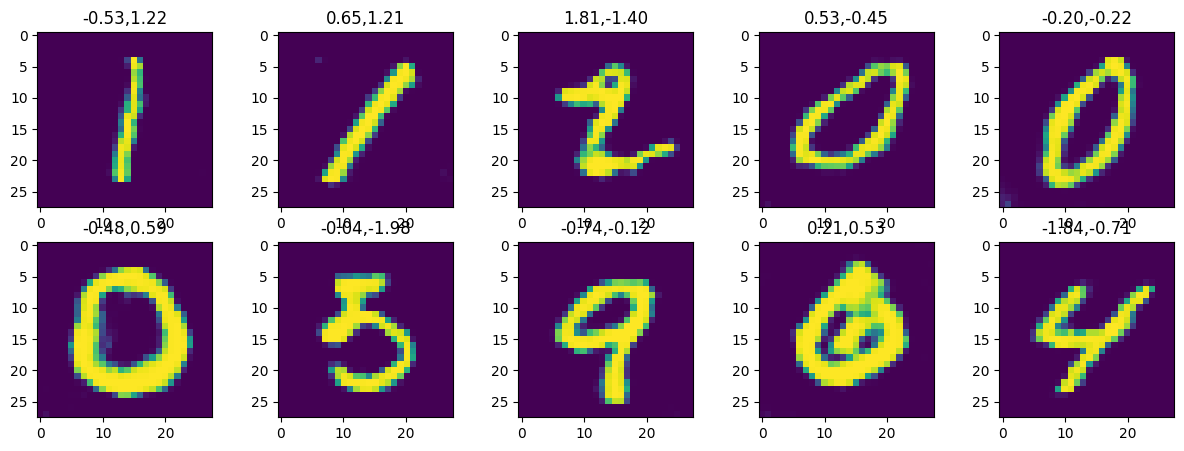

Epoch 5
0.6302087903022766 0.3792578876018524
0.6057897806167603 0.2917627990245819
0.708354115486145 0.37247589230537415
0.5486660003662109 0.2413494884967804
0.6512879133224487 0.3579409718513489
0.6235464215278625 0.3433022201061249


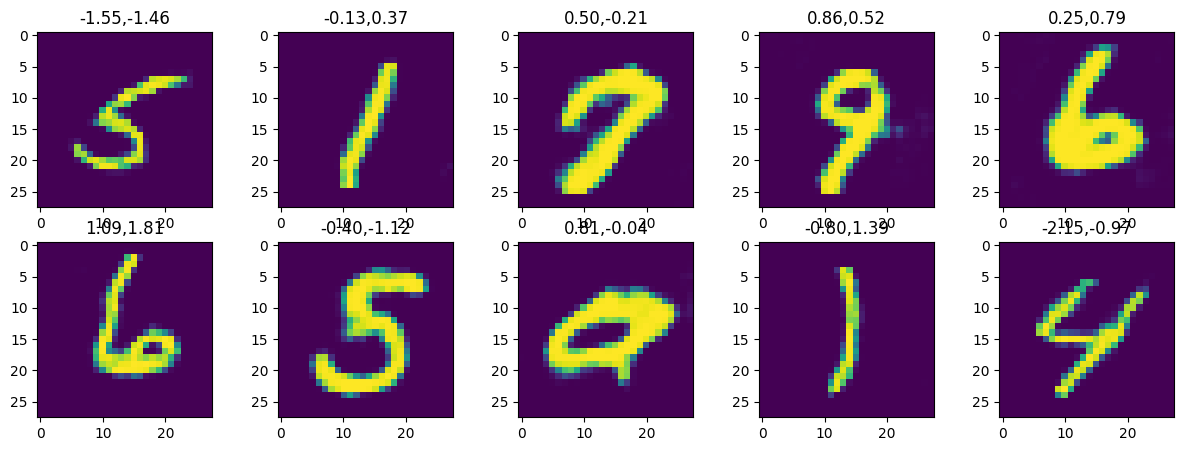

Epoch 6
0.7807566523551941 0.5233122110366821
0.8016142249107361 0.5443886518478394
0.5681250095367432 0.29827845096588135
0.6142507791519165 0.3232949674129486
0.6517237424850464 0.3826424181461334
0.6173691153526306 0.3095094561576843


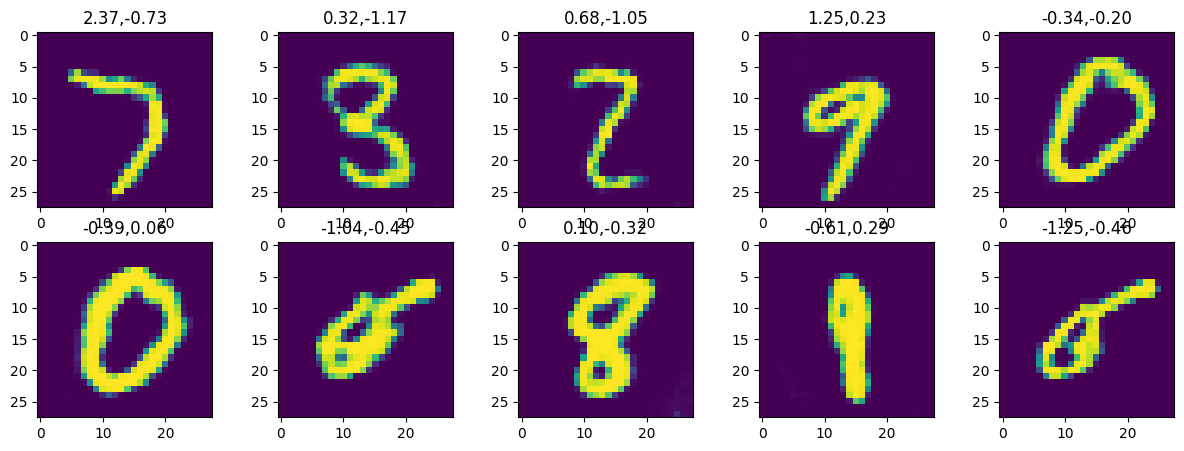

Epoch 7
0.7088882327079773 0.3998388350009918
0.6314505338668823 0.2748480439186096
0.6490246653556824 0.3386034369468689
0.7805714011192322 0.5008509755134583
0.5644791126251221 0.2760681211948395
0.6495999097824097 0.362373024225235


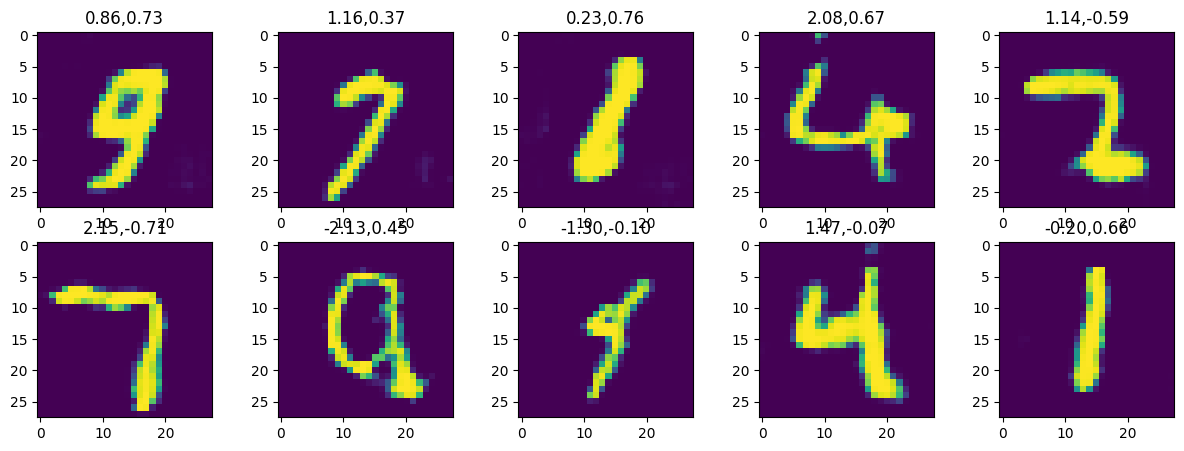

Epoch 8
0.7405340671539307 0.4847241938114166
0.4737482964992523 0.21759121119976044
0.5285272598266602 0.23521052300930023
0.7788407802581787 0.47925955057144165
0.7929610013961792 0.4951811730861664
0.6096832752227783 0.2968674898147583


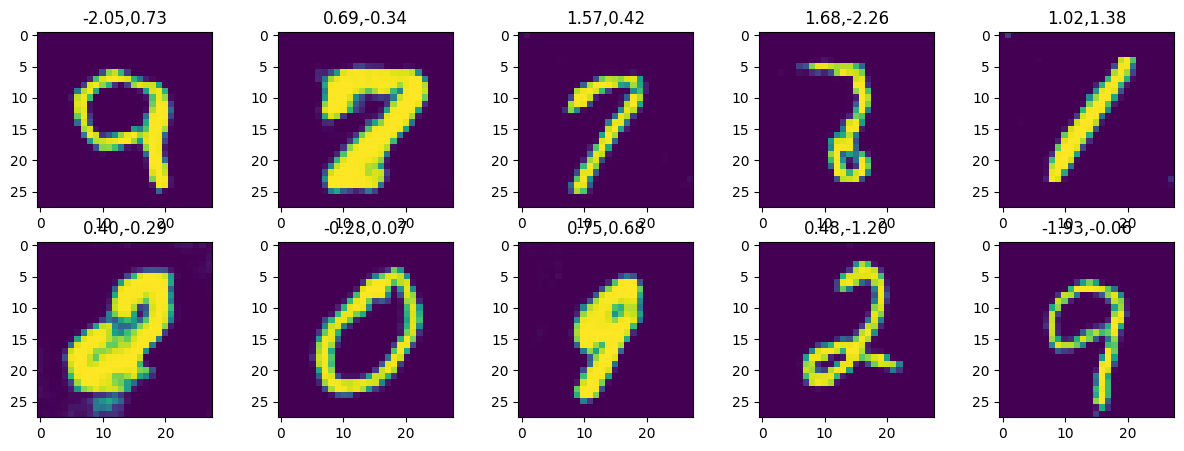

Epoch 9
0.6116254925727844 0.27441221475601196
0.7123568654060364 0.36873477697372437
0.7068883180618286 0.39117661118507385
0.7063354253768921 0.45046675205230713
0.800715446472168 0.5832318663597107
0.8007739186286926 0.577041745185852


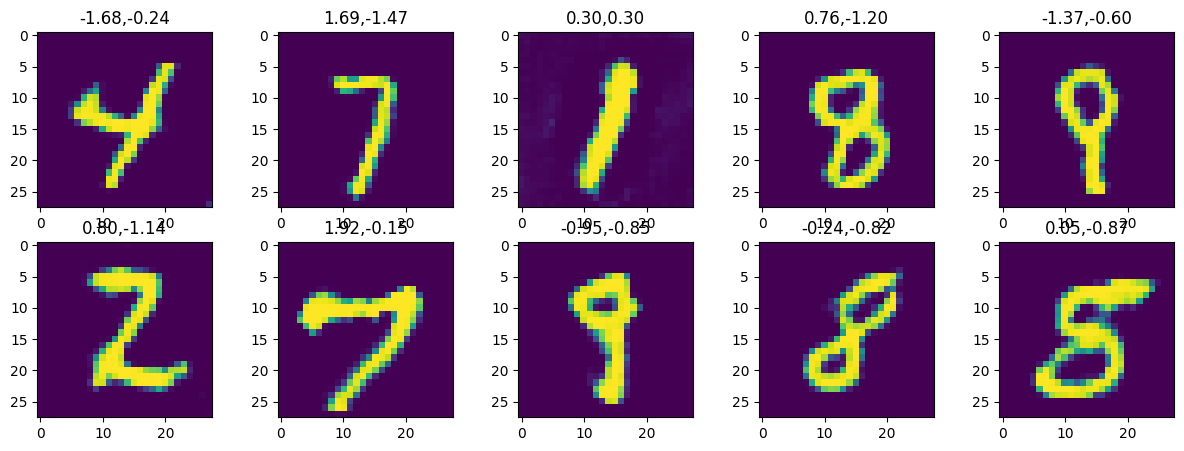

Epoch 10
0.4803909659385681 0.17210301756858826
0.5863370299339294 0.24291850626468658
0.7723467350006104 0.5176126956939697
0.8392869234085083 0.5567054748535156
0.7358963489532471 0.41822168231010437
0.7461947202682495 0.426310271024704


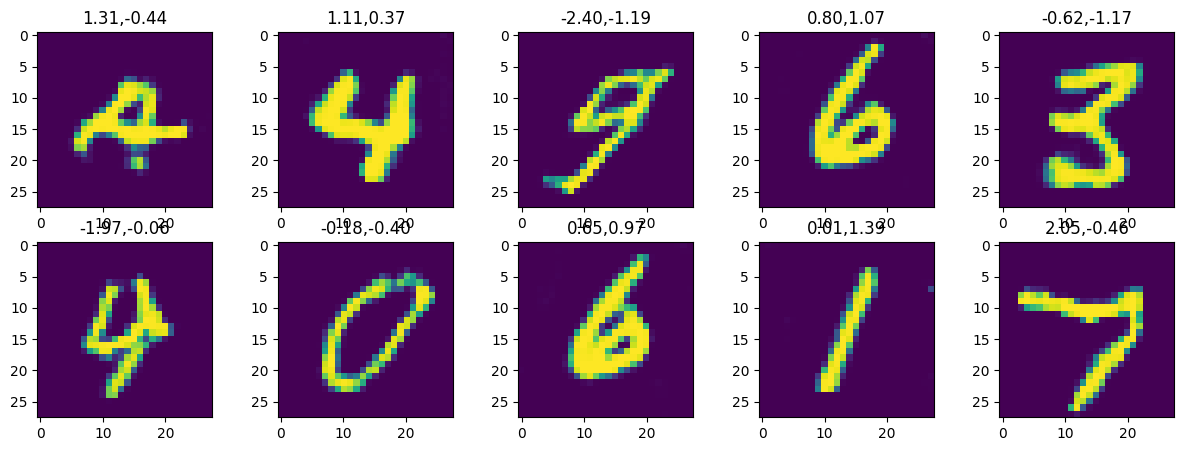

Epoch 11
0.5573713183403015 0.216053307056427
0.6975311636924744 0.3528883159160614
0.6026604771614075 0.24512383341789246
0.6709564328193665 0.3060280978679657
0.5819781422615051 0.2474924772977829
0.5327171087265015 0.1653594970703125


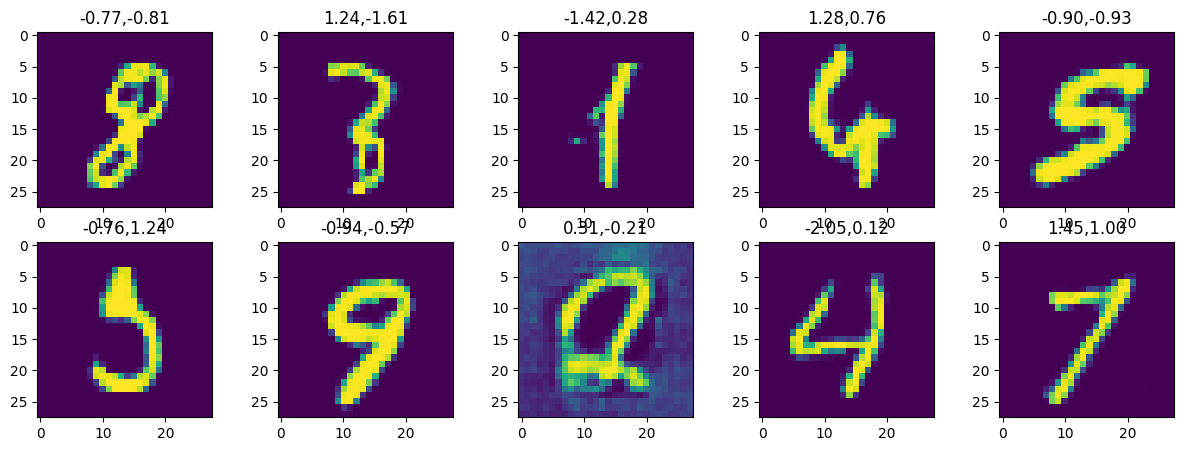

Epoch 12
0.6964955925941467 0.32861655950546265


KeyboardInterrupt: 

In [26]:
optimizer_D = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5,0.999))
optimizer_G = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5,0.999))

for epoch in range(40):
    print("Epoch {}".format(epoch + 1))
    
    for idx, (images, labels) in enumerate(data_loader):
        images = images.to(device)
        with torch.no_grad():
            z = torch.randn(images.shape[0], nz, 1, 1, device=device)
            fake_images = netG(z)
        d_loss_real, D_real, d_loss_fake, D_fake = discriminator_loss(netD, images, fake_images)
        optimizer_D.zero_grad()
        d_loss_real.backward()
        d_loss_fake.backward()
        optimizer_D.step()

        z = torch.randn(images.shape[0], nz, 1, 1, device=device)
        fake_images = netG(z)
        loss = generator_loss(netD, fake_images)
        optimizer_G.zero_grad()
        loss.backward()
        optimizer_G.step()

        if idx % 100 == 0:
            print(D_real.item(), D_fake.item())
    
    fig,ax = plt.subplots(2,5, figsize=(15,5))
    with torch.no_grad():
        # Plot generated images
        z = torch.randn(10,nz,1,1).to(device)
        out = netG(z).squeeze().cpu().detach().numpy()
        for i in range(10):
            x = i % 5
            y = i // 5
            ax[y][x].imshow(out[i])
            ax[y][x].set_title("{:.2f},{:.2f}".format(z[i,0,0,0],z[i,1,0,0]))
    plt.show()

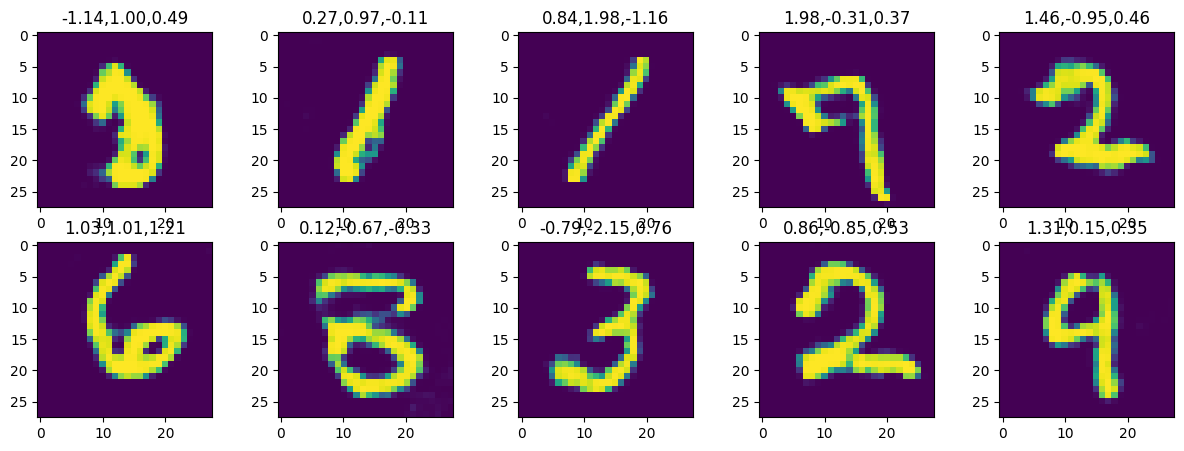

In [27]:
with torch.no_grad():
    z = torch.randn(10,3,1,1).to(device)
    out = netG(z).squeeze().cpu().detach().numpy()
fig,ax = plt.subplots(2,5, figsize=(15,5))
for i in range(10):
    x = i % 5
    y = i // 5
    ax[y][x].imshow(out[i])
    ax[y][x].set_title("{:.2f},{:.2f},{:.2f}".format(z[i,0,0,0],z[i,1,0,0],z[i,2,0,0]))

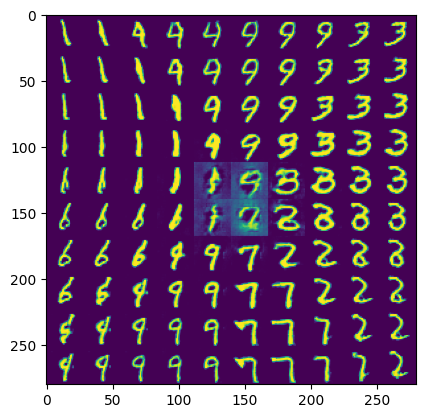

In [28]:
"""Visualize the latent space"""
with torch.no_grad():
    n = 10
    z = torch.cat([torch.linspace(-2.5,2.5,n)[:,None].repeat(n,1), 
                   torch.linspace(2.5,-2.5,n)[:,None].repeat_interleave(n,0),torch.zeros(n**2,1)],1)[:,:,None,None].to(device)
    out = netG(z).squeeze().cpu().detach().numpy()
out_grid = np.zeros((28*n,28*n))
grid_vals = np.linspace(-1,1,n)
for i in range(n**2):
    x = (i % n)
    y = (i // n)
    out_grid[x*28:(x+1)*28,y*28:(y+1)*28] = out[i]
plt.imshow(out_grid)

In [30]:
netG.load_state_dict(torch.load("./GANmodels/3dGenerator"))
netD.load_state_dict(torch.load("./GANmodels/3dDiscriminator"))

<All keys matched successfully>

In [29]:
torch.save(netG.state_dict(), "./GANmodels/3dGenerator")
torch.save(netD.state_dict(), "./GANmodels/3dDiscriminator")

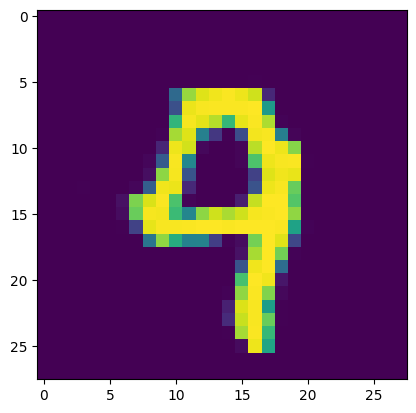

In [31]:
with torch.no_grad():
    z = torch.Tensor([[-0.3,0.1,0.0]])[:,:,None,None].to(device)
    plt.imshow(netG(z).squeeze().cpu().detach().numpy())